# Imports

In [190]:
from google.colab import drive
# Montar o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)


# Carga da Base e Tratamento do cabeçalho

In [192]:
path = '/content/drive/MyDrive/Pós/Pós Analytics/tech challanger/Producao.csv'

df = pd.read_csv(path, sep=';', index_col=None)


# Ajusta os indice e cabeçalho
def corrigir_preposicoes(frase):
    # Substitui 'De' e 'Com' por 'de' e 'com', respectivamente
    frase_corrigida = re.sub(r'\bDe\b', 'de', frase)
    frase_corrigida = re.sub(r'\bCom\b', 'com', frase_corrigida)

    return frase_corrigida


df = df.iloc[:, 2:].set_index('VINHO DE MESA.1').T.copy()
df.reset_index()
df.rename(columns={'VINHO DE MESA.1':'VINHO DE MESA'}, inplace=True)
df.reset_index(inplace=True)
df.columns.name = 'index'
df.rename(columns={'index':'VINHO DE MESA'}, inplace=True)
columns_new = {}
for name in df.columns.to_list():
  columns_new[name] = name.title()
df.rename(columns=columns_new, inplace=True)

columns_new = {}
for name in df.columns.to_list():
  columns_new[name] = corrigir_preposicoes(name)
df.rename(columns=columns_new, inplace=True)

df.head()

index,Vinho de Mesa,Tinto,Branco,Rosado,Vinho Fino de Mesa (Vinífera),Tinto,Branco,Rosado,Suco,Suco de Uva Integral,Suco de Uva Concentrado,Suco de Uva Adoçado,Suco de Uva Reconstituído,Derivados,Espumante,Espumante Moscatel,Base Espumante,Base Espumante Moscatel,Base Champenoise Champanha,Base Charmat Champanha,Bebida de Uva,Polpa de Uva,Mosto Simples,Mosto Concentrado,Mosto de Uva com Bagaço,Mosto Dessulfitado,Mistelas,Néctar de Uva,Licorosos,Compostos,Jeropiga,Filtrado,Frisante,Vinho Leve,Vinho Licoroso,Brandy,Destilado,Bagaceira,Licor de Bagaceira,Vinagre,Borra Líquida,Borra Seca,Vinho Composto,Pisco,Outros Derivados
0,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,0,0,0,14164329,0,0,0,0,0,0,0,0,7170736,0,0,0,1072100,0,282500,0,0,0,0,0,0,0,830030,961290,0,0,3847673,0,0,0,0
1,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,0,0,0,13280518,0,0,0,0,0,0,0,0,7646774,0,0,0,818400,0,270000,45000,0,0,0,0,0,0,0,913200,0,21500,3565644,0,0,0,0
2,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,0,0,0,12314509,0,0,0,0,0,0,0,0,6051822,0,0,0,871200,0,254600,1358300,0,0,0,0,0,0,0,755350,0,8200,3015037,0,0,0,0
3,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,0,0,0,28317919,0,0,0,0,0,0,0,0,21779327,0,0,0,512900,0,176500,1628000,0,0,0,0,0,0,0,661270,0,0,3559922,0,0,0,0
4,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,0,0,0,47904934,0,0,0,0,0,0,0,0,41346735,0,0,0,826300,0,135000,0,0,0,0,0,0,0,0,424620,0,35300,5136979,0,0,0,0


# Tratamento da Base

In [193]:
anos  = [x for x in range(1970, 2020)]

In [194]:
df.head(20)

index,Vinho de Mesa,Tinto,Branco,Rosado,Vinho Fino de Mesa (Vinífera),Tinto,Branco,Rosado,Suco,Suco de Uva Integral,Suco de Uva Concentrado,Suco de Uva Adoçado,Suco de Uva Reconstituído,Derivados,Espumante,Espumante Moscatel,Base Espumante,Base Espumante Moscatel,Base Champenoise Champanha,Base Charmat Champanha,Bebida de Uva,Polpa de Uva,Mosto Simples,Mosto Concentrado,Mosto de Uva com Bagaço,Mosto Dessulfitado,Mistelas,Néctar de Uva,Licorosos,Compostos,Jeropiga,Filtrado,Frisante,Vinho Leve,Vinho Licoroso,Brandy,Destilado,Bagaceira,Licor de Bagaceira,Vinagre,Borra Líquida,Borra Seca,Vinho Composto,Pisco,Outros Derivados
0,217208604,174224052,748400,42236152,23899346,7591557,15562889,744900,1097771,1097771,0,0,0,14164329,0,0,0,0,0,0,0,0,7170736,0,0,0,1072100,0,282500,0,0,0,0,0,0,0,830030,961290,0,0,3847673,0,0,0,0
1,154264651,121133369,1160500,31970782,23586062,7265666,15655709,664687,2296654,2296654,0,0,0,13280518,0,0,0,0,0,0,0,0,7646774,0,0,0,818400,0,270000,45000,0,0,0,0,0,0,0,913200,0,21500,3565644,0,0,0,0
2,146953297,118180926,1812367,26960004,21078771,6782837,13289304,1006630,3509440,3509440,0,0,0,12314509,0,0,0,0,0,0,0,0,6051822,0,0,0,871200,0,254600,1358300,0,0,0,0,0,0,0,755350,0,8200,3015037,0,0,0,0
3,116710345,88589019,243900,27877426,12368410,3419625,7930070,1018715,0,0,0,0,0,28317919,0,0,0,0,0,0,0,0,21779327,0,0,0,512900,0,176500,1628000,0,0,0,0,0,0,0,661270,0,0,3559922,0,0,0,0
4,193875345,146544484,4138768,43192093,31644124,10047658,18927471,2668995,0,0,0,0,0,47904934,0,0,0,0,0,0,0,0,41346735,0,0,0,826300,0,135000,0,0,0,0,0,0,0,0,424620,0,35300,5136979,0,0,0,0
5,177401209,144274134,1441507,31685568,39424590,14731106,21933695,2759789,0,0,0,0,0,53633143,0,0,0,0,0,0,0,0,48185206,0,0,0,223000,0,24000,0,0,0,0,0,0,0,0,576098,0,0,4624839,0,0,0,0
6,144565438,118360170,1871473,24333795,34500590,12405154,19874659,2220777,0,0,0,0,0,22925012,0,0,0,0,0,0,0,0,18220527,0,0,0,205500,0,4400,0,107500,0,0,0,0,0,0,705912,0,288000,3393173,0,0,0,0
7,195359778,154801826,4954387,35603565,41264971,16131758,20409231,4723982,0,0,0,0,0,24015856,0,0,0,0,0,0,0,0,22097156,0,0,0,553200,0,525000,0,12500,0,0,0,0,0,0,828000,0,0,0,0,0,0,0
8,200053669,162917363,5079748,32056558,36750933,15000671,17640081,4110181,0,0,0,0,0,41607777,0,0,0,0,0,0,0,0,40052456,0,0,0,242150,0,479971,75000,60000,0,0,0,0,0,0,698200,0,0,0,0,0,0,0
9,211252982,154736439,7146395,49370148,46129710,14356453,25727132,6046125,0,0,0,0,0,35370846,0,0,0,0,0,0,0,0,34318456,0,0,0,60300,0,34000,0,20000,0,0,0,0,0,0,938090,0,0,0,0,0,0,0


In [195]:
df.shape

(50, 45)

## Separando os produtos por tipo
(Vinho de Mesa, Vinho Fino de Mesa, Suco e Derivados)

### Vinho de Mesa

In [196]:
df_mesa = df.iloc[:, 1:4].copy()
df_mesa['Ano'] = anos
df_mesa.head()

index,Tinto,Branco,Rosado,Ano
0,174224052,748400,42236152,1970
1,121133369,1160500,31970782,1971
2,118180926,1812367,26960004,1972
3,88589019,243900,27877426,1973
4,146544484,4138768,43192093,1974


In [197]:
# método melt para transformar o layout
df_melted = pd.melt(df_mesa, id_vars=['Ano'], var_name='Produto', value_name='Produção (L)')

# Resultado final
df_mesa = df_melted.copy()
df_mesa['Tipo'] = 'Vinho de Mesa'
df_mesa.head()

,Ano,Produto,Produção (L),Tipo
0,1970,Tinto,174224052,Vinho de Mesa
1,1971,Tinto,121133369,Vinho de Mesa
2,1972,Tinto,118180926,Vinho de Mesa
3,1973,Tinto,88589019,Vinho de Mesa
4,1974,Tinto,146544484,Vinho de Mesa


### Vinho Fino de Mesa

In [198]:
df_fino_mesa = df.iloc[:, 5:8].copy()
df_fino_mesa['Ano'] = anos
df_fino_mesa.head()

index,Tinto,Branco,Rosado,Ano
0,7591557,15562889,744900,1970
1,7265666,15655709,664687,1971
2,6782837,13289304,1006630,1972
3,3419625,7930070,1018715,1973
4,10047658,18927471,2668995,1974


In [199]:
# método melt para transformar o layout
df_melted = pd.melt(df_fino_mesa, id_vars=['Ano'], var_name='Produto', value_name='Produção (L)')

# Resultado final
df_fino_mesa = df_melted.copy()
df_fino_mesa['Tipo'] = 'Vinho Fino de Mesa (Vinífera)'
df_fino_mesa.head()

,Ano,Produto,Produção (L),Tipo
0,1970,Tinto,7591557,Vinho Fino de Mesa (Vinífera)
1,1971,Tinto,7265666,Vinho Fino de Mesa (Vinífera)
2,1972,Tinto,6782837,Vinho Fino de Mesa (Vinífera)
3,1973,Tinto,3419625,Vinho Fino de Mesa (Vinífera)
4,1974,Tinto,10047658,Vinho Fino de Mesa (Vinífera)


### Suco

In [200]:
df_suco = df.iloc[:, 9:13].copy()
df_suco['Ano'] = anos
df_suco.head()

index,Suco de Uva Integral,Suco de Uva Concentrado,Suco de Uva Adoçado,Suco de Uva Reconstituído,Ano
0,1097771,0,0,0,1970
1,2296654,0,0,0,1971
2,3509440,0,0,0,1972
3,0,0,0,0,1973
4,0,0,0,0,1974


In [201]:
# método melt para transformar o layout
df_melted = pd.melt(df_suco, id_vars=['Ano'], var_name='Produto', value_name='Produção (L)')

# Resultado final
df_suco = df_melted.copy()
df_suco['Produto'] = df_suco['Produto'].str.replace('Suco de Uva ', '')
df_suco['Tipo'] = 'Suco'
df_suco.head()

,Ano,Produto,Produção (L),Tipo
0,1970,Integral,1097771,Suco
1,1971,Integral,2296654,Suco
2,1972,Integral,3509440,Suco
3,1973,Integral,0,Suco
4,1974,Integral,0,Suco


### Derivados

In [202]:
df_derivados = df.iloc[:, 14:].copy()
df_derivados['Ano'] = anos
df_derivados.head()

index,Espumante,Espumante Moscatel,Base Espumante,Base Espumante Moscatel,Base Champenoise Champanha,Base Charmat Champanha,Bebida de Uva,Polpa de Uva,Mosto Simples,Mosto Concentrado,Mosto de Uva com Bagaço,Mosto Dessulfitado,Mistelas,Néctar de Uva,Licorosos,Compostos,Jeropiga,Filtrado,Frisante,Vinho Leve,Vinho Licoroso,Brandy,Destilado,Bagaceira,Licor de Bagaceira,Vinagre,Borra Líquida,Borra Seca,Vinho Composto,Pisco,Outros Derivados,Ano
0,0,0,0,0,0,0,0,0,7170736,0,0,0,1072100,0,282500,0,0,0,0,0,0,0,830030,961290,0,0,3847673,0,0,0,0,1970
1,0,0,0,0,0,0,0,0,7646774,0,0,0,818400,0,270000,45000,0,0,0,0,0,0,0,913200,0,21500,3565644,0,0,0,0,1971
2,0,0,0,0,0,0,0,0,6051822,0,0,0,871200,0,254600,1358300,0,0,0,0,0,0,0,755350,0,8200,3015037,0,0,0,0,1972
3,0,0,0,0,0,0,0,0,21779327,0,0,0,512900,0,176500,1628000,0,0,0,0,0,0,0,661270,0,0,3559922,0,0,0,0,1973
4,0,0,0,0,0,0,0,0,41346735,0,0,0,826300,0,135000,0,0,0,0,0,0,0,0,424620,0,35300,5136979,0,0,0,0,1974


In [203]:
# método melt para transformar o layout
df_melted = pd.melt(df_derivados, id_vars=['Ano'], var_name='Produto', value_name='Produção (L)')

# Resultado final
df_derivados = df_melted.copy()
df_derivados['Tipo'] = 'Derivados'
df_derivados.head()

,Ano,Produto,Produção (L),Tipo
0,1970,Espumante,0,Derivados
1,1971,Espumante,0,Derivados
2,1972,Espumante,0,Derivados
3,1973,Espumante,0,Derivados
4,1974,Espumante,0,Derivados


## Unificando dataframes de produtos

In [204]:
dataframes = [df_mesa, df_fino_mesa, df_suco, df_derivados]
df_tratado = pd.concat(dataframes)
df_tratado = df_tratado[['Ano', 'Tipo', 'Produto', 'Produção (L)']].copy()
df_tratado.head()

,Ano,Tipo,Produto,Produção (L)
0,1970,Vinho de Mesa,Tinto,174224052
1,1971,Vinho de Mesa,Tinto,121133369
2,1972,Vinho de Mesa,Tinto,118180926
3,1973,Vinho de Mesa,Tinto,88589019
4,1974,Vinho de Mesa,Tinto,146544484


# Análise Exploratória

## Produção por ano e produtos

<ipython-input-205-3a7d49210f4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Produção (L) Milhões'] = subset['Produção (L)'] / 1000000  # Divida por um milhão
<ipython-input-205-3a7d49210f4a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ano', y='Produção (L) Milhões', data=subset, estimator=sum, ci=None)


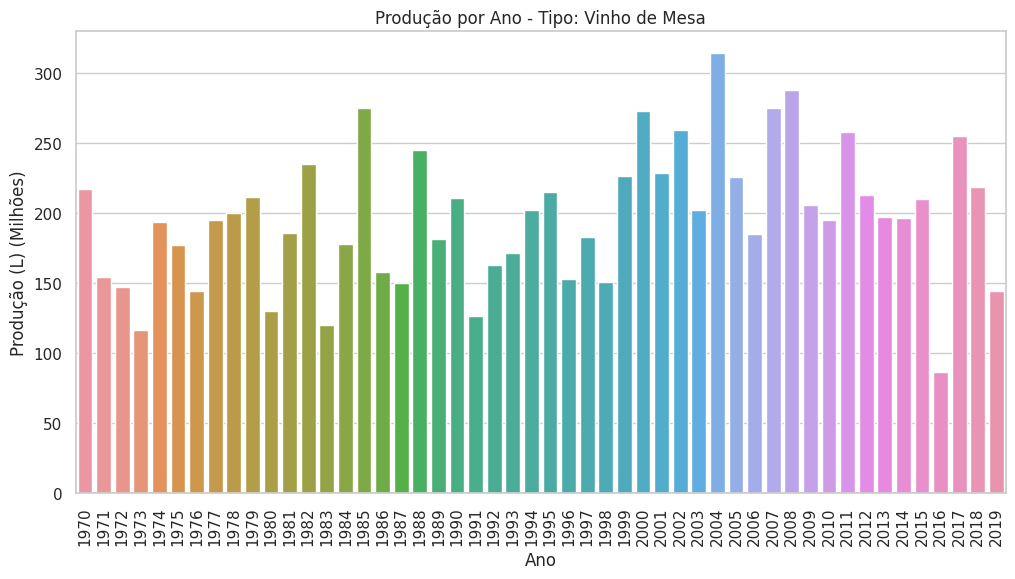

<ipython-input-205-3a7d49210f4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Produção (L) Milhões'] = subset['Produção (L)'] / 1000000  # Divida por um milhão
<ipython-input-205-3a7d49210f4a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ano', y='Produção (L) Milhões', data=subset, estimator=sum, ci=None)


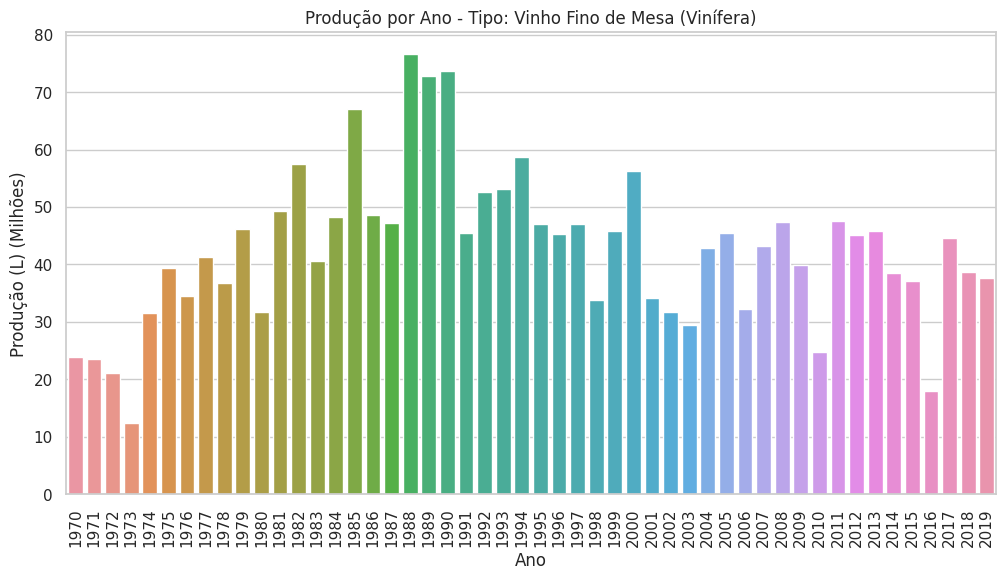

<ipython-input-205-3a7d49210f4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Produção (L) Milhões'] = subset['Produção (L)'] / 1000000  # Divida por um milhão
<ipython-input-205-3a7d49210f4a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ano', y='Produção (L) Milhões', data=subset, estimator=sum, ci=None)


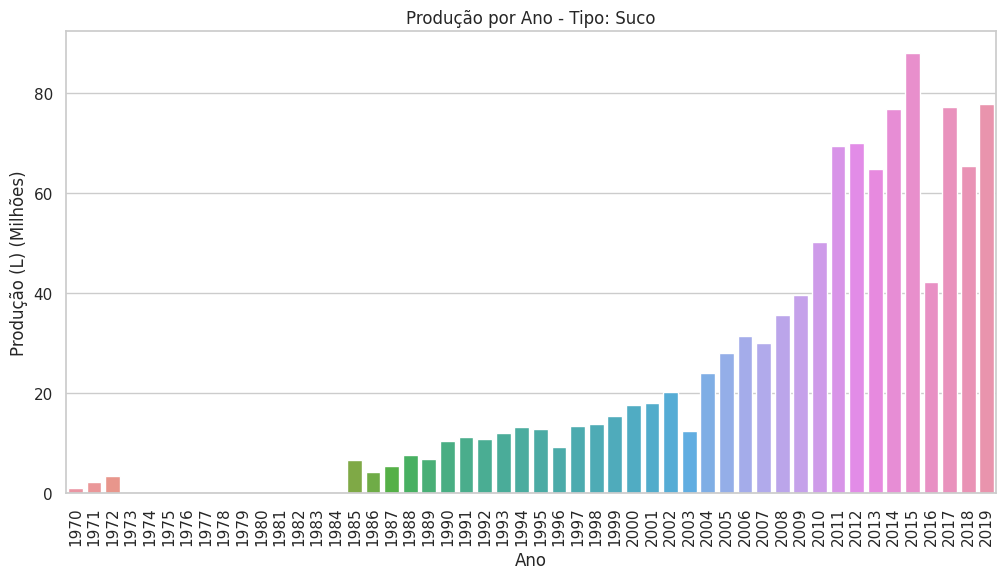

<ipython-input-205-3a7d49210f4a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Produção (L) Milhões'] = subset['Produção (L)'] / 1000000  # Divida por um milhão
<ipython-input-205-3a7d49210f4a>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ano', y='Produção (L) Milhões', data=subset, estimator=sum, ci=None)


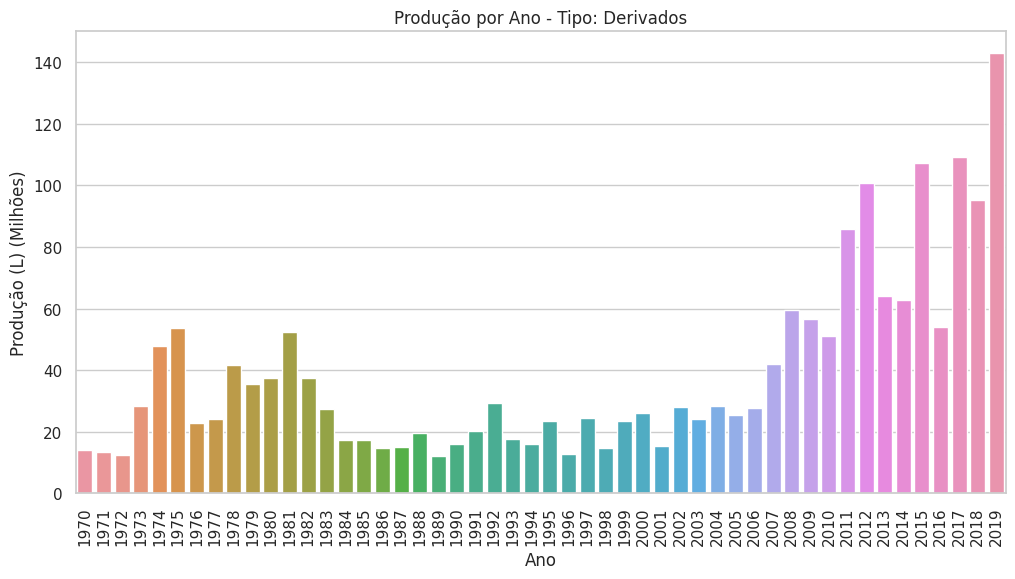

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_tratado seja o seu dataframe

# Defina o estilo seaborn para melhorar a estética do gráfico
sns.set(style="whitegrid")

# Crie um gráfico de barra para cada tipo de vinho
tipos_de_vinho = df_tratado['Tipo'].unique()

for tipo in tipos_de_vinho:
    plt.figure(figsize=(12, 6))
    subset = df_tratado[df_tratado['Tipo'] == tipo]
    subset['Produção (L) Milhões'] = subset['Produção (L)'] / 1000000  # Divida por um milhão
    sns.barplot(x='Ano', y='Produção (L) Milhões', data=subset, estimator=sum, ci=None)
    plt.title(f'Produção por Ano - Tipo: {tipo}')
    plt.xlabel('Ano')
    plt.ylabel('Produção (L) (Milhões)')

    # Gire os rótulos do eixo x
    plt.xticks(rotation=90)

    plt.show()


<ipython-input-213-6f4c252633a9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)'] / 1000000  # Divida por um milhão


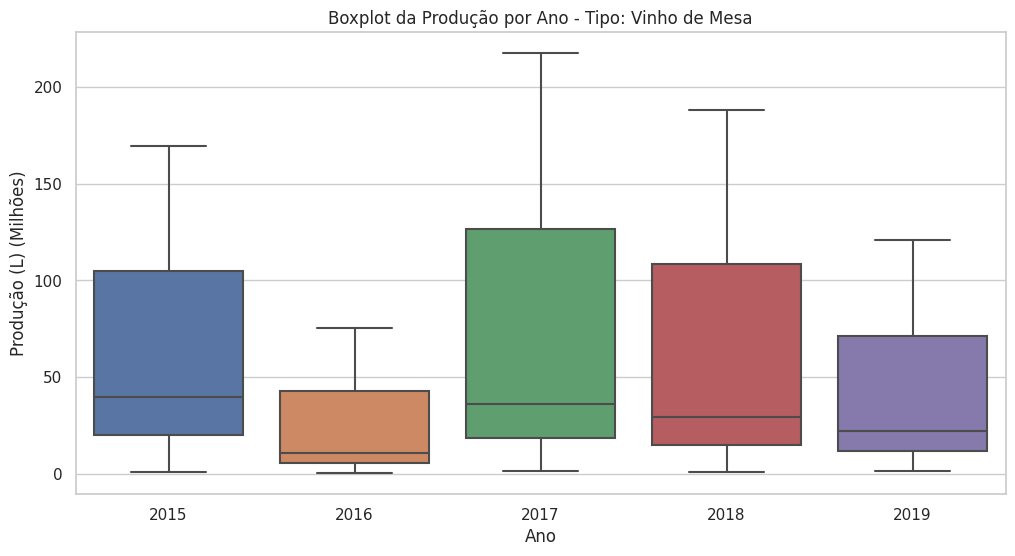

<ipython-input-213-6f4c252633a9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)'] / 1000000  # Divida por um milhão


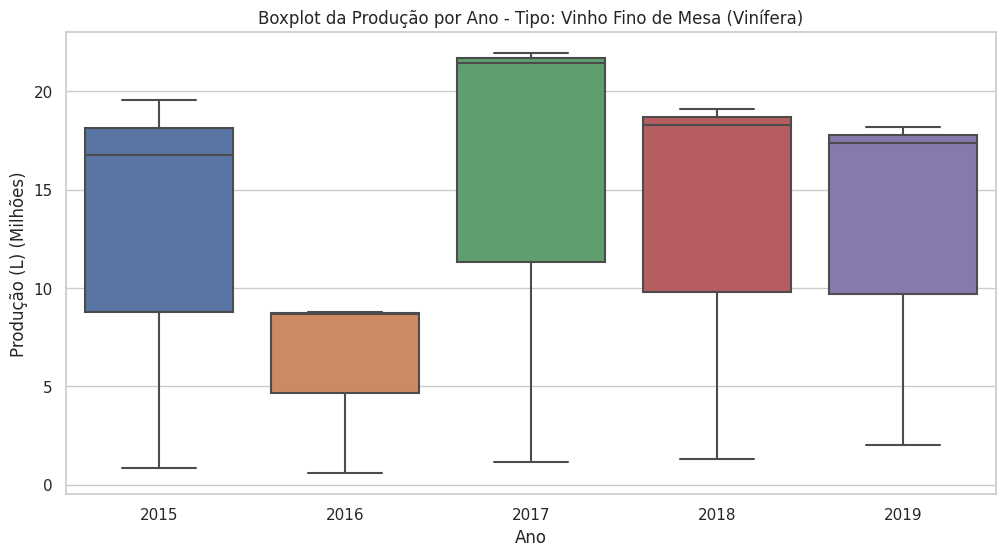

<ipython-input-213-6f4c252633a9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)'] / 1000000  # Divida por um milhão


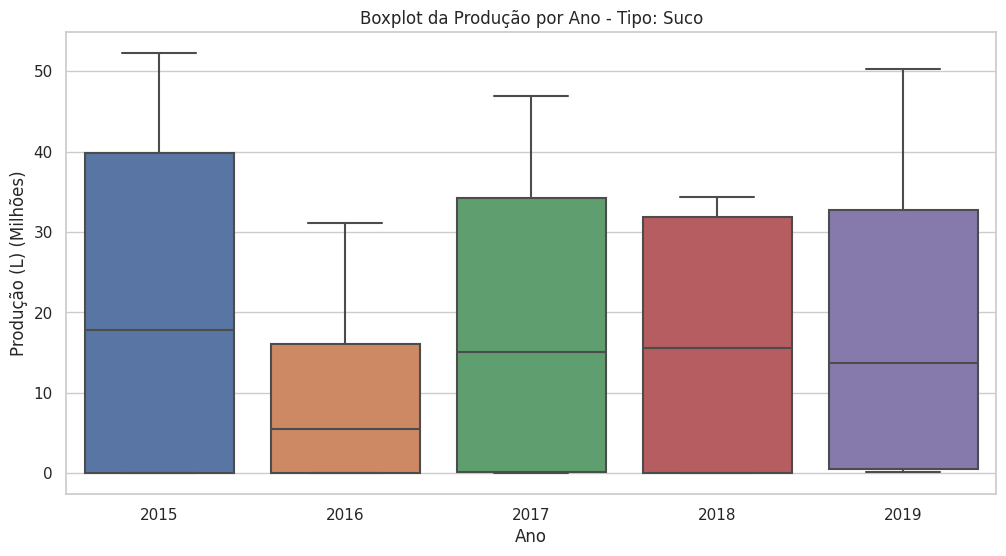

<ipython-input-213-6f4c252633a9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)'] / 1000000  # Divida por um milhão


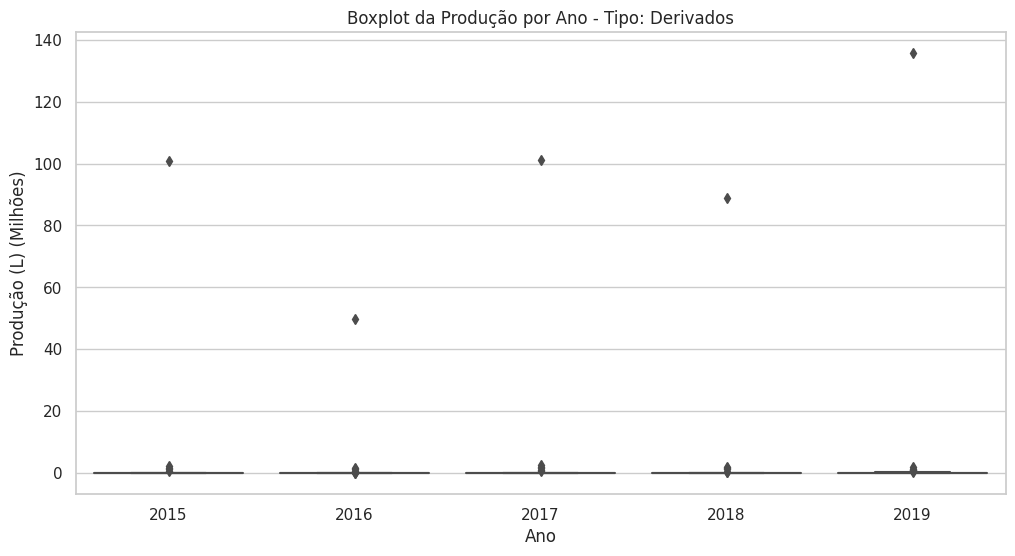

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_tratado seja o seu dataframe

# Filtrar os tipos de vinho
tipos_de_vinho = df_tratado['Tipo'].unique()

# Defina o estilo seaborn para melhorar a estética do gráfico
sns.set(style="whitegrid")

# Crie um boxplot para cada tipo de vinho
for tipo in tipos_de_vinho:
    plt.figure(figsize=(12, 6))
    subset = df_tratado[df_tratado['Tipo'] == tipo]
    subset_ultimos_5_anos = subset[subset['Ano'] >= subset['Ano'].max() - 4]
    subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)'] / 1000000  # Divida por um milhão
    sns.boxplot(x='Ano', y='Produção (L) Milhões', data=subset_ultimos_5_anos)
    plt.title(f'Boxplot da Produção por Ano - Tipo: {tipo}')
    plt.xlabel('Ano')
    plt.ylabel('Produção (L) (Milhões)')

    plt.show()


<ipython-input-215-198a3ed6095f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)']  # Divida por um milhão


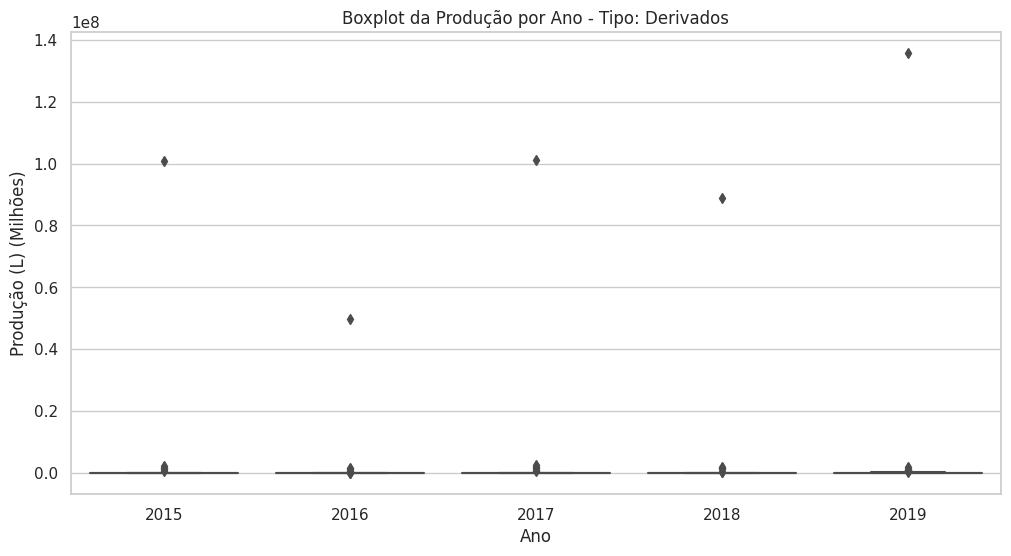

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df_tratado seja o seu dataframe

# Filtrar o tipo 'Derivados'
tipo_derivados = 'Derivados'
subset_derivados = df_tratado[df_tratado['Tipo'] == tipo_derivados]
subset_ultimos_5_anos = subset_derivados[subset_derivados['Ano'] >= subset_derivados['Ano'].max() - 4]

# Defina o estilo seaborn para melhorar a estética do gráfico
sns.set(style="whitegrid")

# Crie um boxplot para o tipo 'Derivados'
plt.figure(figsize=(12, 6))
subset_ultimos_5_anos['Produção (L) Milhões'] = subset_ultimos_5_anos['Produção (L)'] / 1000000  # Divida por um milhão
sns.boxplot(x='Ano', y='Produção (L) Milhões', data=subset_ultimos_5_anos)
plt.title(f'Boxplot da Produção por Ano - Tipo: {tipo_derivados}')
plt.xlabel('Ano')
plt.ylabel('Produção (L) (Milhões)')

plt.show()


In [240]:
import plotly.express as px
import pandas as pd

# Supondo que df_tratado seja o seu dataframe
df_tratado_ = df_tratado.groupby(['Ano','Tipo']).sum().reset_index().copy()

# Filtrar os últimos 5 anos
df_ultimos_5_anos = df_tratado_[df_tratado_['Ano'] >= df_tratado_['Ano'].max() - 4]

# Divida a produção por um milhão para facilitar a leitura
df_ultimos_5_anos['Produção (L) Milhões'] = df_ultimos_5_anos['Produção (L)'] / 1000000

# Normalize a produção para o percentual por ano
df_ultimos_5_anos['Percentual'] = df_ultimos_5_anos.groupby('Ano')['Produção (L) Milhões'].transform(lambda x: x / x.sum() * 100).round(2)


# Crie um gráfico de colunas empilhadas 100% com Plotly Express
fig = px.bar(df_ultimos_5_anos, x='Ano', y='Percentual', color='Tipo',
             labels={'Percentual': 'Percentual da Produção (%)'},
             title='Percentual da Produção por Ano e Tipo (Últimos 5 Anos)',
             width=800, height=500)

# Posicione a legenda no canto inferior esquerdo
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal', orientation='h', xanchor='left', yanchor='bottom'))

fig.show()


<ipython-input-240-73da02092e35>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-240-73da02092e35>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-240-73da02092e35>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

